In [7]:
import wdlen
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Manchester = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
wdlen_list = wdlen.wordlenth(Manchester)

In [67]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

,fname,age,one,two,three,four,five,sum
0,Manchester/anne/anne01a.xml,22,130,56,12,0,0,198
1,Manchester/anne/anne01b.xml,22,177,95,19,0,0,291
2,Manchester/anne/anne02a.xml,23,192,158,40,5,1,396
3,Manchester/anne/anne02b.xml,23,222,142,35,4,0,403
4,Manchester/anne/anne03a.xml,23,263,87,39,10,2,401
5,Manchester/anne/anne03b.xml,23,181,87,29,13,1,311
6,Manchester/anne/anne04a.xml,23,257,106,47,12,5,427
7,Manchester/anne/anne04b.xml,23,217,84,45,9,2,357
8,Manchester/anne/anne05a.xml,24,177,114,52,12,2,357
9,Manchester/anne/anne05b.xml,24,215,131,45,13,0,404


In [ ]:
df['sum'] = df.loc[:, 'one':'five'].sum(axis = 1)
df

In [68]:
df_per = df

In [69]:
df_per.loc[:, "one":"five"] = df.loc[:,"one":"five"].div(df["sum"], axis=0)
df_per

,fname,age,one,two,three,four,five,sum
0,Manchester/anne/anne01a.xml,22,0.656566,0.282828,0.060606,0.000000,0.000000,198
1,Manchester/anne/anne01b.xml,22,0.608247,0.326460,0.065292,0.000000,0.000000,291
2,Manchester/anne/anne02a.xml,23,0.484848,0.398990,0.101010,0.012626,0.002525,396
3,Manchester/anne/anne02b.xml,23,0.550868,0.352357,0.086849,0.009926,0.000000,403
4,Manchester/anne/anne03a.xml,23,0.655860,0.216958,0.097257,0.024938,0.004988,401
5,Manchester/anne/anne03b.xml,23,0.581994,0.279743,0.093248,0.041801,0.003215,311
6,Manchester/anne/anne04a.xml,23,0.601874,0.248244,0.110070,0.028103,0.011710,427
7,Manchester/anne/anne04b.xml,23,0.607843,0.235294,0.126050,0.025210,0.005602,357
8,Manchester/anne/anne05a.xml,24,0.495798,0.319328,0.145658,0.033613,0.005602,357
9,Manchester/anne/anne05b.xml,24,0.532178,0.324257,0.111386,0.032178,0.000000,404


In [71]:
df_per = df_per.drop(['sum'], axis = 1)

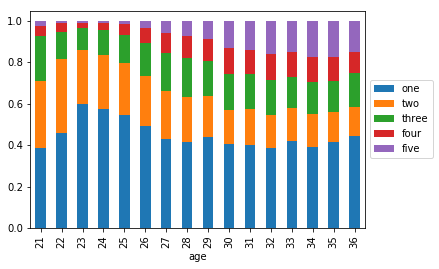

In [74]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

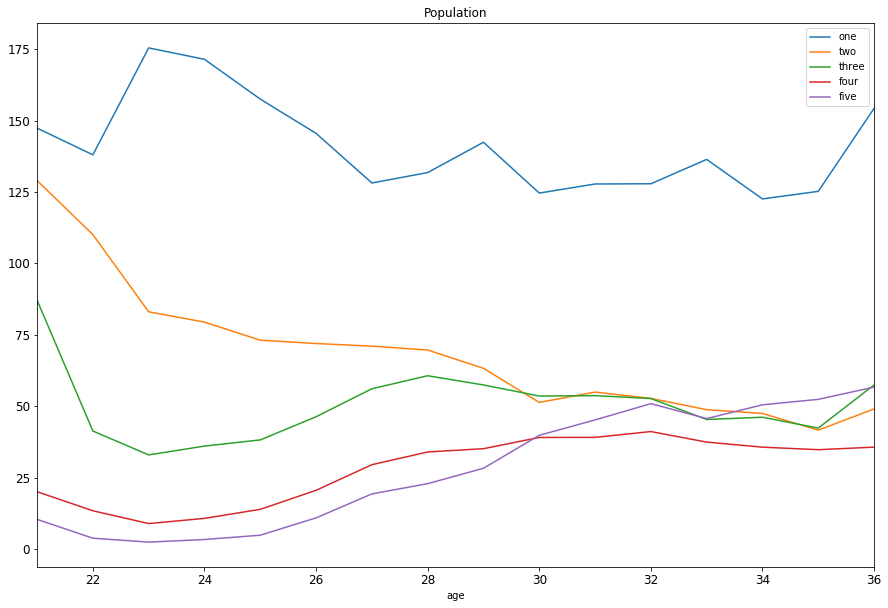

In [4]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', figsize=(15,10), fontsize=12)
plt.show()

In [5]:
writer = pd.ExcelWriter('Manchester.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

## without one-word utterances

In [13]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Manchester = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
wdlen = wdlen.wdlen_no1(Manchester)

In [14]:
df_no1 = pd.DataFrame(wdlen).dropna()
df_no1 = df_no1[['fname', 'age', 'two','three', 'four', 'five']]
df_no1

,fname,age,two,three,four,five
0,Manchester/anne/anne01a.xml,22,56,12,0,0
1,Manchester/anne/anne01b.xml,22,95,19,0,0
2,Manchester/anne/anne02a.xml,23,158,40,5,1
3,Manchester/anne/anne02b.xml,23,142,35,4,0
4,Manchester/anne/anne03a.xml,23,87,39,10,2
5,Manchester/anne/anne03b.xml,23,87,29,13,1
6,Manchester/anne/anne04a.xml,23,106,47,12,5
7,Manchester/anne/anne04b.xml,23,84,45,9,2
8,Manchester/anne/anne05a.xml,24,114,52,12,2
9,Manchester/anne/anne05b.xml,24,131,45,13,0


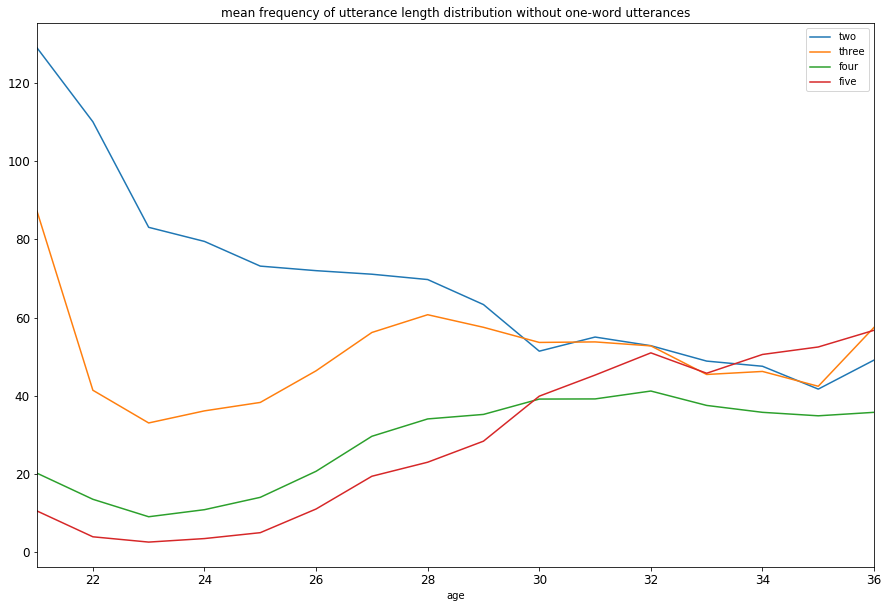

In [15]:
plt.figure()
df2_no1 = df_no1.groupby('age').mean().reset_index()
df2_no1.set_index('age').plot.line(rot=0, title='mean frequency of utterance length distribution without one-word utterances', figsize=(15,10), fontsize=12)
plt.show()

In [26]:
df_no1["sum"] = df_no1.loc[:, 'two':'five'].sum(axis=1)
df_no1

,fname,age,two,three,four,five,sum
0,Manchester/anne/anne01a.xml,22,0.012111,0.002595,0.000000,0.000000,0.014706
1,Manchester/anne/anne01b.xml,22,0.007310,0.001462,0.000000,0.000000,0.008772
2,Manchester/anne/anne02a.xml,23,0.003797,0.000961,0.000120,0.000024,0.004902
3,Manchester/anne/anne02b.xml,23,0.004334,0.001068,0.000122,0.000000,0.005525
4,Manchester/anne/anne03a.xml,23,0.004568,0.002048,0.000525,0.000105,0.007246
5,Manchester/anne/anne03b.xml,23,0.005148,0.001716,0.000769,0.000059,0.007692
6,Manchester/anne/anne04a.xml,23,0.003668,0.001626,0.000415,0.000173,0.005882
7,Manchester/anne/anne04b.xml,23,0.004286,0.002296,0.000459,0.000102,0.007143
8,Manchester/anne/anne05a.xml,24,0.003519,0.001605,0.000370,0.000062,0.005556
9,Manchester/anne/anne05b.xml,24,0.003667,0.001260,0.000364,0.000000,0.005291


In [27]:
df_perno1 = df_no1
df_perno1.loc[:, 'two':'five'] = df_no1.loc[:,"two":"five"].div(df_no1["sum"], axis=0)
df_perno1

,fname,age,two,three,four,five,sum
0,Manchester/anne/anne01a.xml,22,0.823529,0.176471,0.000000,0.000000,0.014706
1,Manchester/anne/anne01b.xml,22,0.833333,0.166667,0.000000,0.000000,0.008772
2,Manchester/anne/anne02a.xml,23,0.774510,0.196078,0.024510,0.004902,0.004902
3,Manchester/anne/anne02b.xml,23,0.784530,0.193370,0.022099,0.000000,0.005525
4,Manchester/anne/anne03a.xml,23,0.630435,0.282609,0.072464,0.014493,0.007246
5,Manchester/anne/anne03b.xml,23,0.669231,0.223077,0.100000,0.007692,0.007692
6,Manchester/anne/anne04a.xml,23,0.623529,0.276471,0.070588,0.029412,0.005882
7,Manchester/anne/anne04b.xml,23,0.600000,0.321429,0.064286,0.014286,0.007143
8,Manchester/anne/anne05a.xml,24,0.633333,0.288889,0.066667,0.011111,0.005556
9,Manchester/anne/anne05b.xml,24,0.693122,0.238095,0.068783,0.000000,0.005291


In [33]:
df_perno1.drop(['sum'], axis = 1)

,fname,age,two,three,four,five
0,Manchester/anne/anne01a.xml,22,0.823529,0.176471,0.000000,0.000000
1,Manchester/anne/anne01b.xml,22,0.833333,0.166667,0.000000,0.000000
2,Manchester/anne/anne02a.xml,23,0.774510,0.196078,0.024510,0.004902
3,Manchester/anne/anne02b.xml,23,0.784530,0.193370,0.022099,0.000000
4,Manchester/anne/anne03a.xml,23,0.630435,0.282609,0.072464,0.014493
5,Manchester/anne/anne03b.xml,23,0.669231,0.223077,0.100000,0.007692
6,Manchester/anne/anne04a.xml,23,0.623529,0.276471,0.070588,0.029412
7,Manchester/anne/anne04b.xml,23,0.600000,0.321429,0.064286,0.014286
8,Manchester/anne/anne05a.xml,24,0.633333,0.288889,0.066667,0.011111
9,Manchester/anne/anne05b.xml,24,0.693122,0.238095,0.068783,0.000000


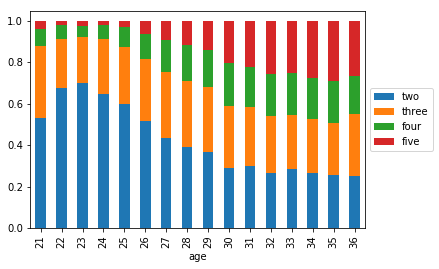

In [76]:
ax = df_perno1.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()